1.Пусть $X_1,\ldots,X_n\sim R[0,\theta]$. Исследуем как устроены доверительные интервалы в этом случае.

1.1 Строя асимптотический интервал, мы можем рассматривать различные состоятельные оценки дисперсии. Сравним насколько изменится интервал при использовании оценки $S^2$ или оценки, основанной на подстановке в дисперсию вместо $\theta$ оценки $(n+1)X_{(n)}/n$

a) Какая из оценок дисперсии точнее и насколько?

b) Построить два асимптотических доверительных интервала, используя $\overline{X}$ и оценивая дисперсию с помощью двух указанных оценок.

c) Найти эмпирические доверительне вероятности интервалов (построить $1000$ выборок, подсчитать долю тех, для которых интервал накрыл истинное значение параметра), сравнить между собой и с уровнем $1-\alpha$ (для разных $n,\,\alpha=0.05,\,0.01,\,0.0001.$)

In [1]:
import numpy as np
import math
from scipy.stats import uniform
from scipy.stats import norm

In [40]:
#пункта a

n = 100
theta = 4
x = np.random.uniform(0, theta, n)

mean_value = np.mean(x)
max_value = np.max(x)

#подсчет выборочной дисперсии
s_square = 0

def ssquare(x):
    result = 0
    mean_value = np.mean(x)
    n = np.size(x)
    for xx in x:
        result += 1/n*(xx - mean_value)**2
    return result

s_square = ssquare(x)

est_d = ((((n+1)*max_value)/n)**2)/12
real_d = (theta**2)/12


if (abs(real_d - s_square) < abs(real_d - est_d)):
    diff = abs(real_d - est_d) - abs(real_d - s_square)
    print("Выборочная дисперсия точнее на %f" % (diff))
else:
    diff = abs(real_d - s_square) - abs(real_d - est_d)
    print("Подстановка оценки в дисперсию точнее на %f" % (diff))

Подстановка оценки в дисперсию точнее на 0.126613


Построим асимптотический доверительный интервал, используя $\overline{X}.$

$\dfrac{\sqrt{n}\left(\overline{X}-\frac{\theta}{2}\right)}{\sqrt{D X_{1}}} \sim N(0,1) \Rightarrow$ минимизируя длину интервала получаем: $\left(2 \overline{X}-u_{1-\frac{a}{2}} \dfrac{2 \sqrt{D X_{1}}}{\sqrt{n}}, 2 \overline{X}+u_{1-\frac{a}{2}} \dfrac{2 \sqrt{D X_{1}}}{\sqrt{n}}\right)$

In [41]:
#пункт b

def make_interval(est, mean, n, a):
    lhs = 2*mean - (2*norm.ppf(1-a/2)*math.sqrt(est))/math.sqrt(n) 
    rhs = 2*mean + (2*norm.ppf(1-a/2)*math.sqrt(est))/math.sqrt(n) 
    return [lhs, rhs]

a = 0.05
span_1 = make_interval(s_square, mean_value, n, a)
span_2 = make_interval(est_d, mean_value, n, a)
print("Первый доверительный интервал (S^2): ", span_1[0], span_1[1])
print("Второй доверительный интервал (оценка): ", span_2[0], span_2[1])

Первый доверительный интервал (S^2):  3.437026696870971 4.38921429272563
Второй доверительный интервал (оценка):  3.457917138530051 4.368323851066551


In [42]:
#пункт c

theta = 4
n = [10, 50, 100]
a = [0.05, 0.01, 0.001]

for aa in a:
    for nn in n:
        res1 = 0
        res2 = 0
        for i in range(1000):
            x = np.random.uniform(0, theta, nn)
            mean_value = np.mean(x)
            s_square = ssquare(x)
            est_d = ((((nn+1)*np.max(x))/nn)**2)/12

            span_1 = make_interval(s_square, mean_value, nn, aa)
            span_2 = make_interval(est_d, mean_value, nn, aa)
            
            if (theta >= span_1[0] and theta <= span_1[1]):
                res1 += 1
            if (theta >= span_2[0] and theta <= span_2[1]):
                res2 += 1
                
        print("a = %.3f и n = %d" % (aa, nn))
        print("Для 1-го интервала: %f" % (res1/1000))
        print("Для 2-го интервала: %f" % (res2/1000))
        print("1 - a = %f" % (1 - aa))
        print("\n")

a = 0.050 и n = 10
Для 1-го интервала: 0.905000
Для 2-го интервала: 0.948000
1 - a = 0.950000


a = 0.050 и n = 50
Для 1-го интервала: 0.944000
Для 2-го интервала: 0.957000
1 - a = 0.950000


a = 0.050 и n = 100
Для 1-го интервала: 0.955000
Для 2-го интервала: 0.957000
1 - a = 0.950000


a = 0.010 и n = 10
Для 1-го интервала: 0.961000
Для 2-го интервала: 0.986000
1 - a = 0.990000


a = 0.010 и n = 50
Для 1-го интервала: 0.985000
Для 2-го интервала: 0.992000
1 - a = 0.990000


a = 0.010 и n = 100
Для 1-го интервала: 0.985000
Для 2-го интервала: 0.991000
1 - a = 0.990000


a = 0.001 и n = 10
Для 1-го интервала: 0.987000
Для 2-го интервала: 0.999000
1 - a = 0.999000


a = 0.001 и n = 50
Для 1-го интервала: 0.996000
Для 2-го интервала: 0.996000
1 - a = 0.999000


a = 0.001 и n = 100
Для 1-го интервала: 0.998000
Для 2-го интервала: 0.998000
1 - a = 0.999000




1.2 Для данной модели можно построить также точный интервал:

$$\left(X_{(n)}, X_{(n)} /(\sqrt[n]{1-\alpha})\right)$$

a) Моделировать выборку и построить точный доверительный интервал с помощью достаточной
статистики.

b) Сравнить длины всех трех интервалов: моделировать 1000 выборок, для каждой найти длины доверительных интервалов и построить гистограммы их распределений для разных $n,\, \alpha = 0.05,\, 0.01,\, 0.001$

c) Cравнить средние длины интервалов в предыдущей задаче

Точный интервал:  1.9699345423264987 2.0298413508072954
a = 0.050 и n = 10
Средняя длина 1-го интервала: 1.344291
Средняя длина 2-го интервала: 1.437184
Средняя длина 3-го интервала: 0.637646
a = 0.050 и n = 50
Средняя длина 1-го интервала: 0.633463
Средняя длина 2-го интервала: 0.640131
Средняя длина 3-го интервала: 0.121072
a = 0.050 и n = 100
Средняя длина 1-го интервала: 0.450323
Средняя длина 2-го интервала: 0.452785
Средняя длина 3-го интервала: 0.060239
a = 0.010 и n = 10
Средняя длина 1-го интервала: 1.769667
Средняя длина 2-го интервала: 1.886220
Средняя длина 3-го интервала: 1.066326
a = 0.010 и n = 50
Средняя длина 1-го интервала: 0.831709
Средняя длина 2-го интервала: 0.841571
Средняя длина 3-го интервала: 0.189242
a = 0.010 и n = 100
Средняя длина 1-го интервала: 0.590458
Средняя длина 2-го интервала: 0.595116
Средняя длина 3-го интервала: 0.093364
a = 0.001 и n = 10
Средняя длина 1-го интервала: 2.244686
Средняя длина 2-го интервала: 2.405064
Средняя длина 3-го интервала:

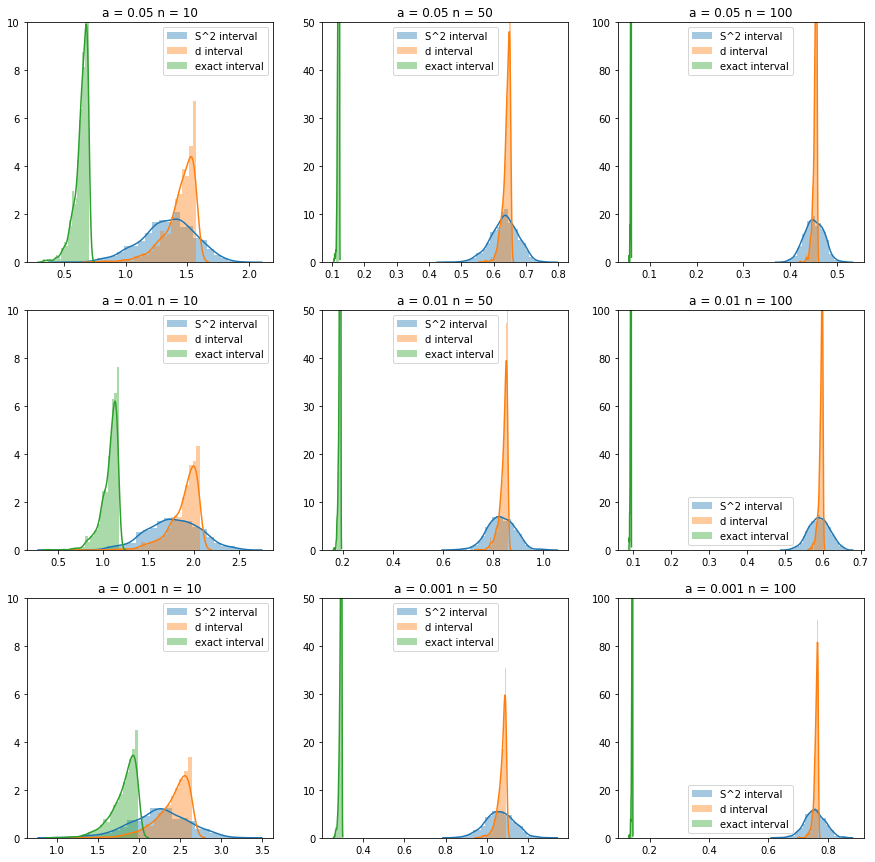

In [43]:
import matplotlib.pyplot as plt
import seaborn as sb

def exact_inter(x, a):
    lhs = np.max(x)
    n = np.size(x)
    rhs = lhs / (pow(a, 1/n))
    return [lhs, rhs]

theta = 2
n = 100
a = 0.05
x = np.random.uniform(0, theta, n)
span = exact_inter(x, a)
print("Точный интервал: ", span[0], span[1])

n = [10, 50, 100]
a = [0.05, 0.01, 0.001]

plt.figure(figsize = (15, 15))
num = 0
for aa in a:
    for nn in n:
        len1 = []
        len2 = []
        len3 = []
        for i in range(1000):
            x = np.random.uniform(0, theta, nn)
            mean_value = np.mean(x)
            s_square = ssquare(x)
            est_d = ((((nn+1)*np.max(x))/nn)**2)/12

            span_1 = make_interval(s_square, mean_value, nn, aa)
            span_2 = make_interval(est_d, mean_value, nn, aa)
            span_3 = exact_inter(x, aa)
            
            len1.append(span_1[1] - span_1[0])
            len2.append(span_2[1] - span_2[0])
            len3.append(span_3[1] - span_3[0])
            
        num += 1
        name = "a = " + str(aa) + " n = " + str(nn)
        plt.subplot(3, 3, num)
        plt.ylim(0, nn)
        sb.distplot(len1, label = 'S^2 interval')
        sb.distplot(len2, label = 'd interval')
        sb.distplot(len3, label = 'exact interval')
        plt.title(name)
        plt.legend()
        
        print("a = %.3f и n = %d" % (aa, nn))
        print("Средняя длина 1-го интервала: %f" % (sum(len1)/1000))
        print("Средняя длина 2-го интервала: %f" % (sum(len2)/1000))
        print("Средняя длина 3-го интервала: %f" % (sum(len3)/1000))

1.3 Выберите из исследованных методов самый эффективный и примените его к следующей задаче. В файле unif.txt содержится информация о $150$ выдаче датчика случайных чисел из некоторого отрезка $[0,\,\alpha].$ Локализуйте $\alpha$ так, чтобы вероятность вашей ошибки была не более $1\%$.

In [44]:
import re
 
file = open("unif.txt")
values = file.read().split("\n")
data = []
 
for key in values:
    value = re.findall(r"[-+]?\d*\.\d+|\d+", key)
    if value != []:
        data.append(float(value[1]))

a = 0.01
span = exact_inter(data, a)
print("Точный доверительный интервал для данных:\n", span[0], span[1])

Точный доверительный интервал для данных:
 3.11871218912089 3.21594513541782
